**Single cell samples integration**

This exercise walks through an alignment of two groups of PBMCs from Kang et al, 2017. In this experiment, PBMCs were split into a stimulated and control group and the stimulated group was treated with interferon beta. The response to interferon caused cell type specific gene expression changes that makes a joint analysis of all the data difficult, with cells clustering both by stimulation condition and by cell type. Here, we demonstrate our integration strategy, as described in Stuart and Butler et al, 2018, for performing integrated analyses to promote the identification of common cell types and enable comparative analyses. While this example demonstrates the integration of two datasets (conditions), these methods have been extended to multiple datasets. This workflow provides an example of integrating four pancreatic islet datasets.

https://satijalab.org/seurat/archive/v3.0/immune_alignment.html

**Integration goals**

The following tutorial is designed to give you an overview of the kinds of comparative analyses on complex cell types that are possible using the Seurat integration procedure. Here, we address three main goals:

1. Identify cell types that are present in both datasets
2. Obtain cell type markers that are conserved in both control and stimulated cells
3. Compare the datasets to find cell-type specific responses to stimulation


Steps on our data

1. combine 2 samples (control from each medium)

2. normalize using harmony and perform UMAP

3. clusters on combined UMAP

4. annotation of cells by marker

5. compare number of cells by type between samples








In [ ]:
install.packages('Seurat')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘sass’, ‘BH’, ‘sitmo’, ‘globals’, ‘listenv’, ‘parallelly’, ‘plyr’, ‘zoo’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’, ‘here’, ‘gplots’, ‘reshape2’, ‘gridExtra’, ‘RcppArmadillo’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘bslib’, ‘spatstat.data’, ‘spatstat.utils’, ‘spatstat.sparse’, ‘abind’, ‘tensor’, ‘goftest’, ‘deldir’, ‘polyclip’, ‘FNN’, ‘RSpectra’, ‘dqrng’, ‘cowplot’, ‘fitdistrplus’, ‘future’, ‘future.apply’, ‘ggrepel’, ‘ggridges’, ‘ica’, ‘igraph’, ‘irlba’, ‘leiden’, ‘lmtest’, ‘matrixStats’, ‘miniUI’, ‘patchwork’, ‘pbapply’, ‘plotly’, ‘png’, ‘RANN’, ‘RcppAnnoy’, ‘reticulate’, ‘ROCR’, ‘Rtsne’, ‘scattermore’, ‘sctransform’, ‘SeuratObject’, ‘shiny’, ‘spatstat.core’, ‘spatstat.geom’, ‘uwot’, ‘RcppEigen’, ‘RcppProgress’




In [ ]:
install.packages('cowplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(Seurat)
library(cowplot)


Attaching SeuratObject



**Setup the Seurat objects**

The gene expression matrices can be found here. We first read in the two count matrices and set up the Seurat objects.

In [ ]:
ctrl.data <- read.table(file = "/content/immune_control_expression_matrix_copy.txt", sep = "\t")
stim.data <- read.table(file = "/content/immune_control_expression_matrix_copy.txt", sep = "\t")



Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“number of items read is not a multiple of the number of columns”
Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“number of items read is not a multiple of the number of columns”


In [ ]:
dim(ctrl.data)
dim(stim.data)

[1] 12751 13019

[1] 12751 13019

In [ ]:
# Set up control object
ctrl <- CreateSeuratObject(counts = ctrl.data, project = "IMMUNE_CTRL", min.cells = 5)


In [ ]:
ctrl

An object of class Seurat 
5281 features across 13019 samples within 1 assay 
Active assay: RNA (5281 features, 0 variable features)

In [ ]:
# Show QC metrics for the first 5 cells
head(ctrl@meta.data, 5)

,orig.ident,nCount_RNA,nFeature_RNA
,<fct>,<dbl>,<int>
AAACATACATTTCC.1,IMMUNE_CTRL,809,352
AAACATACCAGAAA.1,IMMUNE_CTRL,644,298
AAACATACCATGCA.1,IMMUNE_CTRL,218,141
AAACATACCTCGCT.1,IMMUNE_CTRL,823,321
AAACATACCTGGTA.1,IMMUNE_CTRL,971,425


In [ ]:
ctrl$stim <- "CTRL"

# Show QC metrics for the first 5 cells
head(ctrl@meta.data, 5)

,orig.ident,nCount_RNA,nFeature_RNA,stim
,<fct>,<dbl>,<int>,<chr>
AAACATACATTTCC.1,IMMUNE_CTRL,809,352,CTRL
AAACATACCAGAAA.1,IMMUNE_CTRL,644,298,CTRL
AAACATACCATGCA.1,IMMUNE_CTRL,218,141,CTRL
AAACATACCTCGCT.1,IMMUNE_CTRL,823,321,CTRL
AAACATACCTGGTA.1,IMMUNE_CTRL,971,425,CTRL


In [ ]:
ctrl <- subset(ctrl, subset = nFeature_RNA > 250)
# Show QC metrics for the first 5 cells
head(ctrl@meta.data, 5)


,orig.ident,nCount_RNA,nFeature_RNA,stim
,<fct>,<dbl>,<int>,<chr>
AAACATACATTTCC.1,IMMUNE_CTRL,809,352,CTRL
AAACATACCAGAAA.1,IMMUNE_CTRL,644,298,CTRL
AAACATACCTCGCT.1,IMMUNE_CTRL,823,321,CTRL
AAACATACCTGGTA.1,IMMUNE_CTRL,971,425,CTRL
AAACATACTGCGTA.1,IMMUNE_CTRL,884,397,CTRL


In [ ]:
ctrl <- NormalizeData(ctrl, verbose = FALSE)
# Show QC metrics for the first 5 cells
head(ctrl@meta.data, 5)


,orig.ident,nCount_RNA,nFeature_RNA,stim
,<fct>,<dbl>,<int>,<chr>
AAACATACATTTCC.1,IMMUNE_CTRL,809,352,CTRL
AAACATACCAGAAA.1,IMMUNE_CTRL,644,298,CTRL
AAACATACCTCGCT.1,IMMUNE_CTRL,823,321,CTRL
AAACATACCTGGTA.1,IMMUNE_CTRL,971,425,CTRL
AAACATACTGCGTA.1,IMMUNE_CTRL,884,397,CTRL


In [ ]:
ctrl <- FindVariableFeatures(ctrl, selection.method = "vst", nfeatures = 2000)

# Show QC metrics for the first 5 cells
head(ctrl@meta.data, 5)

,orig.ident,nCount_RNA,nFeature_RNA,stim
,<fct>,<dbl>,<int>,<chr>
AAACATACATTTCC.1,IMMUNE_CTRL,809,352,CTRL
AAACATACCAGAAA.1,IMMUNE_CTRL,644,298,CTRL
AAACATACCTCGCT.1,IMMUNE_CTRL,823,321,CTRL
AAACATACCTGGTA.1,IMMUNE_CTRL,971,425,CTRL
AAACATACTGCGTA.1,IMMUNE_CTRL,884,397,CTRL


In [ ]:

# Set up stimulated object
stim <- CreateSeuratObject(counts = stim.data, project = "IMMUNE_STIM", min.cells = 5)
stim$stim <- "STIM"
stim <- subset(stim, subset = nFeature_RNA > 250)
stim <- NormalizeData(stim, verbose = FALSE)
stim <- FindVariableFeatures(stim, selection.method = "vst", nfeatures = 2000)

# Show QC metrics for the first 5 cells
head(stim@meta.data, 5)

,orig.ident,nCount_RNA,nFeature_RNA,stim
,<fct>,<dbl>,<int>,<chr>
AAACATACATTTCC.1,IMMUNE_STIM,809,352,STIM
AAACATACCAGAAA.1,IMMUNE_STIM,644,298,STIM
AAACATACCTCGCT.1,IMMUNE_STIM,823,321,STIM
AAACATACCTGGTA.1,IMMUNE_STIM,971,425,STIM
AAACATACTGCGTA.1,IMMUNE_STIM,884,397,STIM


**Perform integration**

We then identify anchors using the FindIntegrationAnchors function, which takes a list of Seurat objects as input, and use these anchors to integrate the two datasets together with IntegrateData.

In [ ]:
immune.anchors <- FindIntegrationAnchors(object.list = list(ctrl, stim), dims = 1:20)
immune.anchors

Warning message in CheckDuplicateCellNames(object.list = object.list):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 10316 anchors

Filtering anchors

	Retained 7689 anchors



An AnchorSet object containing 15378 anchors between 2 Seurat objects 
 This can be used as input to IntegrateData.

In [ ]:
immune.combined <- IntegrateData(anchorset = immune.anchors, dims = 1:20)

Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [ ]:
immune.combined 

head(immune.combined@meta.data, 10)

An object of class Seurat 
7281 features across 6576 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA

,orig.ident,nCount_RNA,nFeature_RNA,stim
,<chr>,<dbl>,<int>,<chr>
AAACATACATTTCC.1_1,IMMUNE_CTRL,809,352,CTRL
AAACATACCAGAAA.1_1,IMMUNE_CTRL,644,298,CTRL
AAACATACCTCGCT.1_1,IMMUNE_CTRL,823,321,CTRL
AAACATACCTGGTA.1_1,IMMUNE_CTRL,971,425,CTRL
AAACATACTGCGTA.1_1,IMMUNE_CTRL,884,397,CTRL
AAACATTGAGTGTC.1_1,IMMUNE_CTRL,722,347,CTRL
AAACCGTGGAGGCA.1_1,IMMUNE_CTRL,543,283,CTRL
AAACGCACGCTGTA.1_1,IMMUNE_CTRL,772,358,CTRL
AAACGCACTCGCCT.1_1,IMMUNE_CTRL,878,382,CTRL


**Perform an integrated analysis**

Now we can run a single integrated analysis on all cells!

In [ ]:
DefaultAssay(immune.combined) <- "integrated"


In [ ]:
# Run the standard workflow for visualization and clustering
immune.combined_scaled <- ScaleData(immune.combined, verbose = FALSE)
immune.combined_pca <- RunPCA(immune.combined_scaled, npcs = 30, verbose = FALSE)

In [ ]:
immune.combined_pca

An object of class Seurat 
7281 features across 6576 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 1 other assay present: RNA
 1 dimensional reduction calculated: pca

In [ ]:
# t-SNE and Clustering
immune.combined_umap <- RunUMAP(immune.combined_pca, reduction = "pca", dims = 1:20)
immune.combined_neighbour <- FindNeighbors(immune.combined_umap, reduction = "pca", dims = 1:20)
immune.combined_clus <- FindClusters(immune.combined_neighbour, resolution = 0.5)

09:30:28 UMAP embedding parameters a = 0.9922 b = 1.112

09:30:28 Read 6576 rows and found 20 numeric columns

09:30:28 Using Annoy for neighbor search, n_neighbors = 30

09:30:28 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:30:29 Writing NN index file to temp file /tmp/RtmpHNT0KN/file4179d0dbdd

09:30:29 Searching Annoy index using 1 thread, search_k = 3000

09:30:33 Annoy recall = 100%

09:30:33 Commencing smooth kNN distance calibration using 1 thread

09:30:34 Initializing from normalized Laplacian + noise

09:30:35 Commencing optimization for 500 epochs, with 283532 positive edges

09:30:45 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6576
Number of edges: 249179

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8682
Number of communities: 11
Elapsed time: 0 seconds


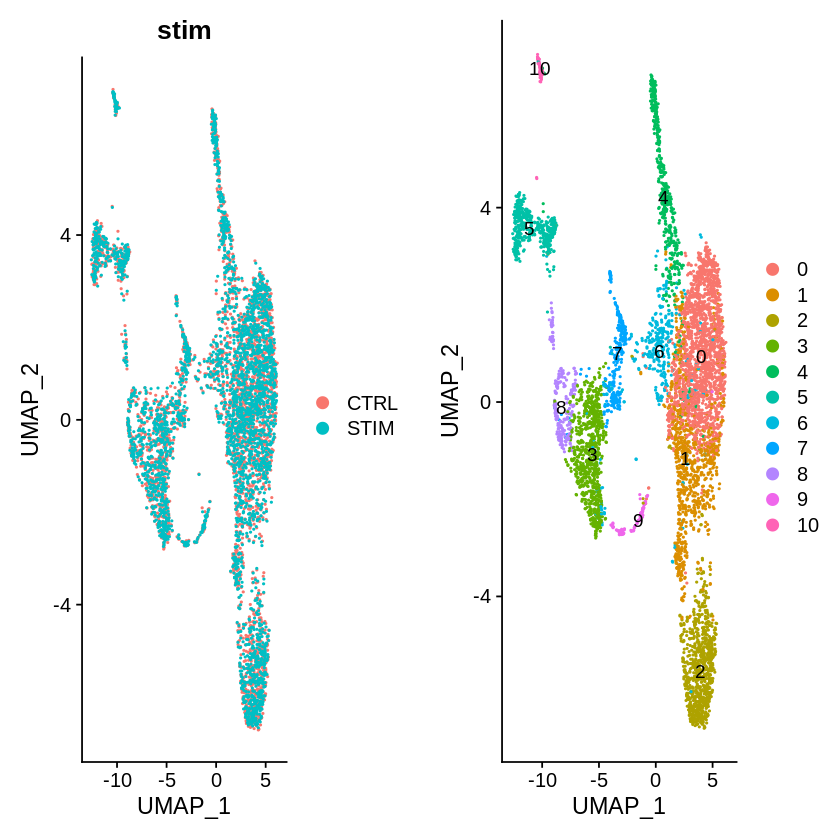

In [ ]:
# Visualization
p1 <- DimPlot(immune.combined_clus, reduction = "umap", group.by = "stim")
p2 <- DimPlot(immune.combined_clus, reduction = "umap", label = TRUE)
plot_grid(p1, p2)

To visualize the two conditions side-by-side, we can use the split.by argument to show each condition colored by cluster.

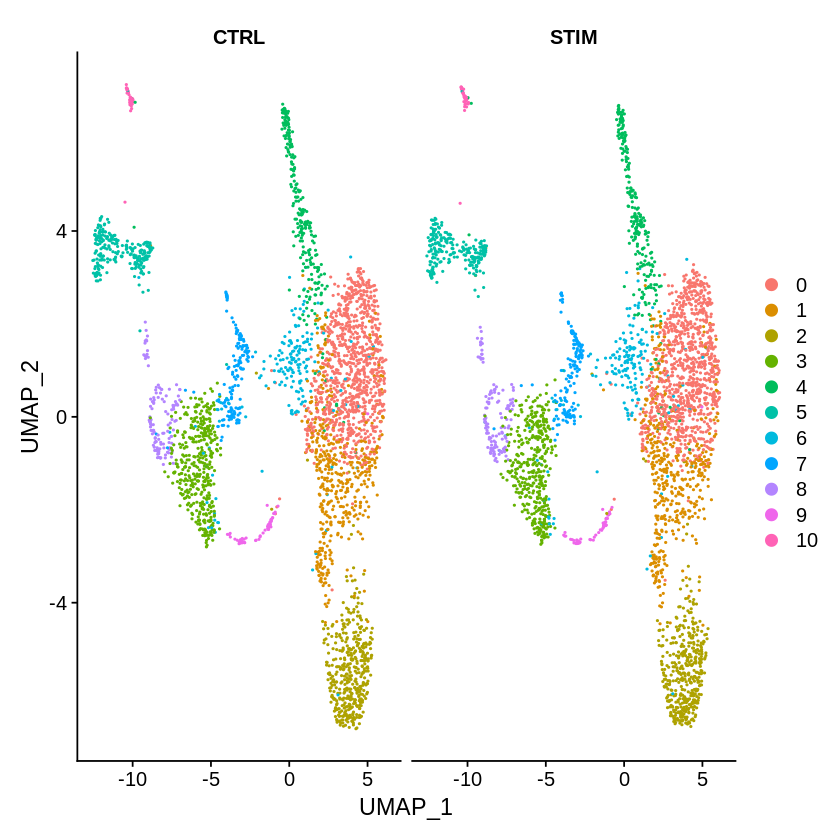

In [ ]:
DimPlot(immune.combined_clus, reduction = "umap", split.by = "stim")

**Identify conserved cell type markers**

To identify canonical cell type marker genes that are conserved across conditions, we provide the FindConservedMarkers function. This function performs differential gene expression testing for each dataset/group and combines the p-values using meta-analysis methods from the MetaDE R package. For example, we can calculated the genes that are conserved markers irrespective of stimulation condition in cluster 7 (NK cells).

In [ ]:
DefaultAssay(immune.combined_clus) <- "RNA"


In [ ]:
install.packages("BiocManager")
BiocManager::install("multtest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'multtest'”
Old packages: 'backports', 'cli', 'generics', 'openssl', 'tzdb', 'usethis',
  'uuid', 'nlme'



In [ ]:
install.packages("BiocManager")
BiocManager::install("metap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.1 (2021-08-10)

Installing package(s) 'metap'

also installing the dependencies ‘tmvnsim’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘mnormt’, ‘numDeriv’, ‘quantreg’, ‘TH.data’, ‘sandwich’, ‘rbibutils’, ‘sn’, ‘mvtnorm’, ‘plotrix’, ‘multcomp’, ‘Rdpack’, ‘TFisher’, ‘mutoss’, ‘mathjaxr’


Old packages: 'backports', 'cli', 'generics', 'openssl', 'tzdb', 'usethis',
  'uuid', 'nlme'



In [ ]:
library(metap)

In [ ]:
nk.markers <- FindConservedMarkers(immune.combined_clus, ident.1 = 7, grouping.var = "stim", verbose = FALSE)
head(nk.markers)

,CTRL_p_val,CTRL_avg_log2FC,CTRL_pct.1,CTRL_pct.2,CTRL_p_val_adj,STIM_p_val,STIM_avg_log2FC,STIM_pct.1,STIM_pct.2,STIM_p_val_adj,max_pval,minimump_p_val
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GNLY,4.916097e-214,6.079578,0.660,0.037,2.596191e-210,4.916097e-214,6.079578,0.660,0.037,2.596191e-210,4.916097e-214,9.832195e-214
FGFBP2,1.048784e-162,3.924690,0.392,0.012,5.538630e-159,1.048784e-162,3.924690,0.392,0.012,5.538630e-159,1.048784e-162,2.097568e-162
GZMK,8.698965e-107,3.344690,0.268,0.009,4.593923e-103,8.698965e-107,3.344690,0.268,0.009,4.593923e-103,8.698965e-107,1.739793e-106
GZMA,9.012313e-102,3.466032,0.294,0.013,4.759403e-98,9.012313e-102,3.466032,0.294,0.013,4.759403e-98,9.012313e-102,1.802463e-101
SH2D2A,1.671555e-80,2.463797,0.399,0.040,8.827480e-77,1.671555e-80,2.463797,0.399,0.040,8.827480e-77,1.671555e-80,3.343109e-80
HOPX,5.745709e-76,2.883439,0.255,0.015,3.034309e-72,5.745709e-76,2.883439,0.255,0.015,3.034309e-72,5.745709e-76,1.149142e-75


We can explore these marker genes for each cluster and use them to annotate our clusters as specific cell types.

Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: CD3D, CREM, CD79A, CCL2”


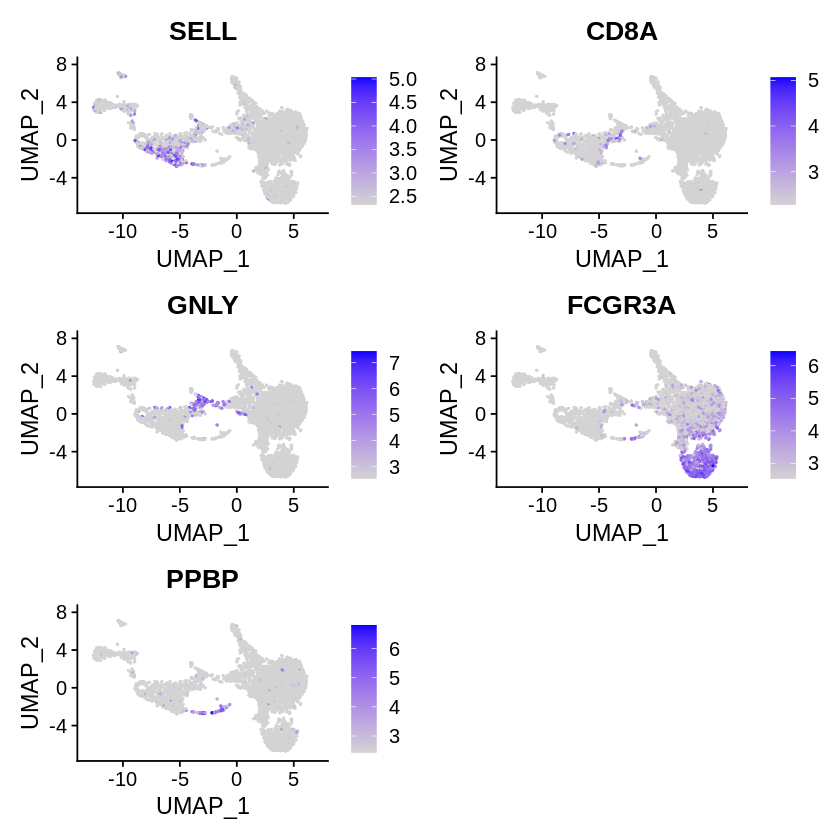

In [ ]:
FeaturePlot(immune.combined_clus, features = c("CD3D", "SELL", "CREM", "CD8A", "GNLY", "CD79A", "FCGR3A", 
    "CCL2", "PPBP"), min.cutoff = "q9")

Warning message:
“Cannot find identity 13”
Warning message:
“Cannot find identity 12”
Warning message:
“Cannot find identity 11”


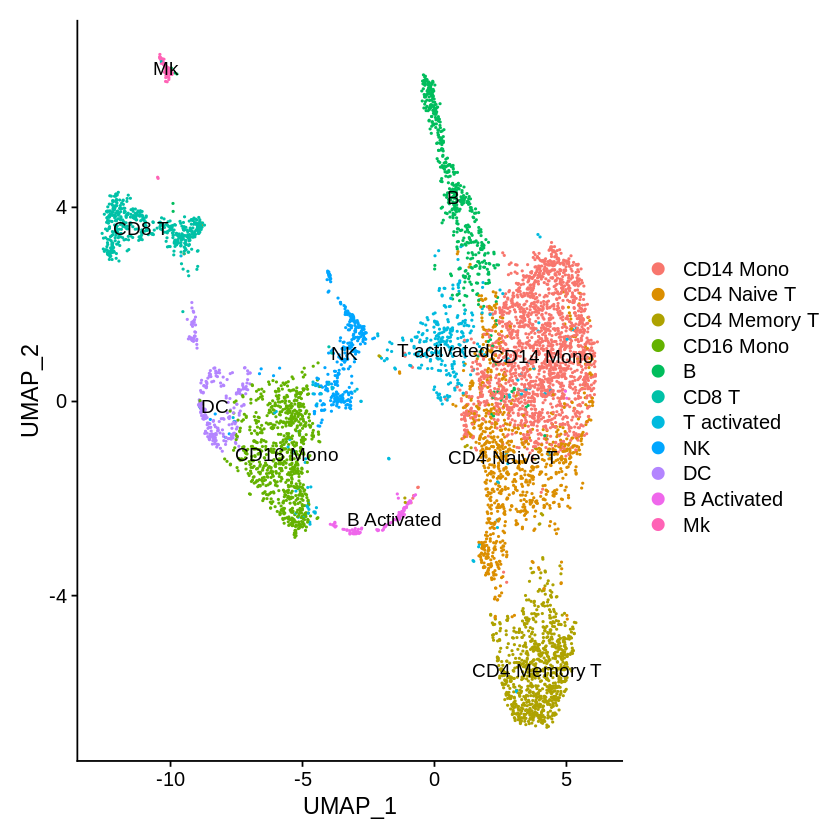

In [ ]:
immune.combined_clus1 <- RenameIdents(immune.combined_clus, `0` = "CD14 Mono", `1` = "CD4 Naive T", `2` = "CD4 Memory T", 
    `3` = "CD16 Mono", `4` = "B", `5` = "CD8 T", `6` = "T activated", `7` = "NK", `8` = "DC", `9` = "B Activated", 
    `10` = "Mk", `11` = "pDC", `12` = "Eryth", `13` = "Mono/Mk Doublets")

DimPlot(immune.combined_clus1, label = TRUE)

The DotPlot function with the split.by parameter can be useful for viewing conserved cell type markers across conditions, showing both the expression level and the percentage of cells in a cluster expressing any given gene. Here we plot 2-3 strong marker genes for each of our 13 clusters.

Warning message in FetchData(object = object, vars = features, cells = cells):
“The following requested variables were not found (10 out of 16 shown): IL3RA, HBB, HBA2, GPR183, CCL2, VMO1, NME1, MIR155HG, CD79A, MS4A1”


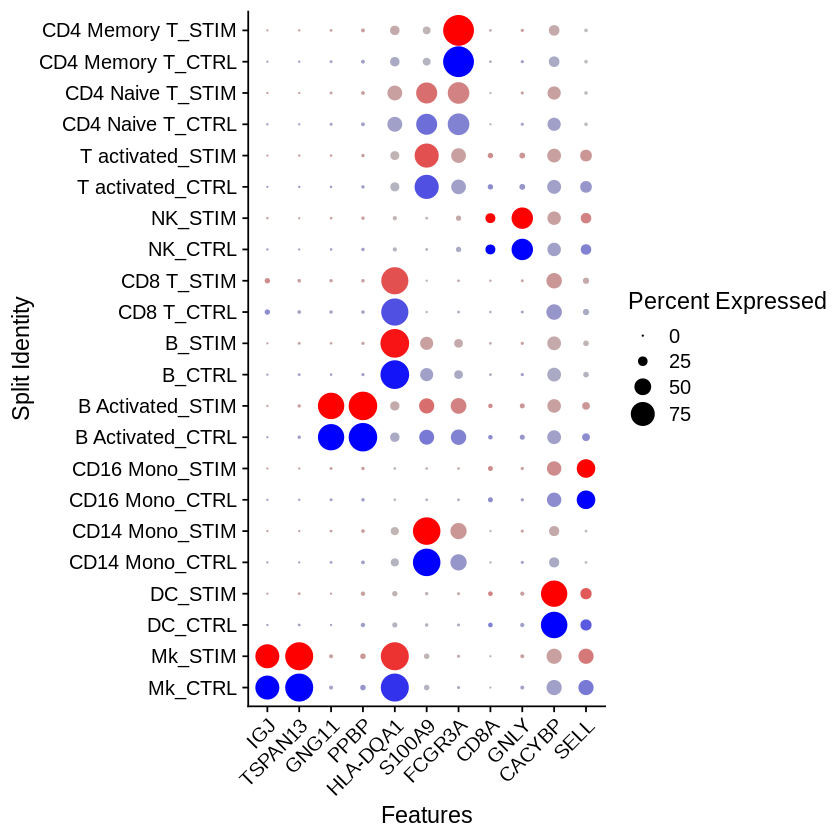

In [ ]:
Idents(immune.combined_clus1) <- factor(Idents(immune.combined_clus1), levels = c("Mono/Mk Doublets", "pDC", 
    "Eryth", "Mk", "DC", "CD14 Mono", "CD16 Mono", "B Activated", "B", "CD8 T", "NK", "T activated", 
    "CD4 Naive T", "CD4 Memory T"))
markers.to.plot <- c("CD3D", "CREM", "HSPH1", "SELL", "GIMAP5", "CACYBP", "GNLY", "NKG7", "CCL5", 
    "CD8A", "MS4A1", "CD79A", "MIR155HG", "NME1", "FCGR3A", "VMO1", "CCL2", "S100A9", "HLA-DQA1", 
    "GPR183", "PPBP", "GNG11", "HBA2", "HBB", "TSPAN13", "IL3RA", "IGJ")
DotPlot(immune.combined_clus1, features = rev(markers.to.plot), cols = c("blue", "red"), dot.scale = 8, 
    split.by = "stim") + RotatedAxis()

**Identify differential expressed genes across conditions**

Now that we’ve aligned the stimulated and control cells, we can start to do comparative analyses and look at the differences induced by stimulation. One way to look broadly at these changes is to plot the average expression of both the stimulated and control cells and look for genes that are visual outliers on a scatter plot. Here, we take the average expression of both the stimulated and control naive T cells and CD14 monocyte populations and generate the scatter plots, highlighting genes that exhibit dramatic responses to interferon stimulation.

In [ ]:
install.packages('ggplot2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
t.cells <- subset(immune.combined_clus1, idents = "CD4 Naive T")
Idents(t.cells) <- "stim"
avg.t.cells <- log1p(AverageExpression(t.cells, verbose = FALSE)$RNA)
avg.t.cells$gene <- rownames(avg.t.cells)

cd14.mono <- subset(immune.combined_clus1, idents = "CD14 Mono")
Idents(cd14.mono) <- "stim"
avg.cd14.mono <- log1p(AverageExpression(cd14.mono, verbose = FALSE)$RNA)
avg.cd14.mono$gene <- rownames(avg.cd14.mono)


Warning message in avg.t.cells$gene <- rownames(avg.t.cells):
“Coercing LHS to a list”
Warning message in avg.cd14.mono$gene <- rownames(avg.cd14.mono):
“Coercing LHS to a list”


In [ ]:
library(ggplot2)

In [ ]:
#genes.to.label = c("ISG15", "LY6E", "IFI6", "ISG20", "MX1", "IFIT2", "IFIT1", "CXCL10", "CCL8")
p11 <- ggplot(avg.t.cells, aes(CTRL, STIM)) + geom_point() + ggtitle("CD4 Naive T Cells")
#p11 <- LabelPoints(plot = p1, points = genes.to.label, repel = TRUE)
p22 <- ggplot(avg.cd14.mono, aes(CTRL, STIM)) + geom_point() + ggtitle("CD14 Monocytes")
#p22 <- LabelPoints(plot = p2, points = genes.to.label, repel = TRUE)
plot_grid(p11, p22)

ERROR: ignored

As you can see, many of the same genes are upregulated in both of these cell types and likely represent a conserved interferon response pathway.

Because we are confident in having identified common cell types across condition, we can ask what genes change in different conditions for cells of the same type. 

First, we create a column in the meta.data slot to hold both the cell type and stimulation information and switch the current ident to that column. 

Then we use FindMarkers to find the genes that are different between stimulated and control B cells. Notice that many of the top genes that show up here are the same as the ones we plotted earlier as core interferon response genes. Additionally, genes like CXCL10 which we saw were specific to monocyte and B cell interferon response show up as highly significant in this list as well.

In [ ]:
immune.combined_clus1$celltype.stim <- paste(Idents(immune.combined_clus1), immune.combined_clus1$stim, sep = "_")
immune.combined_clus1$celltype <- Idents(immune.combined_clus1)
Idents(immune.combined_clus1) <- "celltype.stim"
b.interferon.response <- FindMarkers(immune.combined_clus1, ident.1 = "B_STIM", ident.2 = "B_CTRL", verbose = FALSE)
head(b.interferon.response, n = 15)

Warning message in FindMarkers.default(object = data.use, slot = data.slot, counts = counts, :
“No features pass logfc.threshold threshold; returning empty data.frame”


avg_log2FC,pct.1,pct.2
<dbl>,<dbl>,<dbl>


Another useful way to visualize these changes in gene expression is with the split.by option to the FeaturePlot or VlnPlot function. This will display FeaturePlots of the list of given genes, split by a grouping variable (stimulation condition here). Genes such as CD3D and GNLY are canonical cell type markers (for T cells and NK/CD8 T cells) that are virtually unaffected by interferon stimulation and display similar gene expression patterns in the control and stimulated group. IFI6 and ISG15, on the other hand, are core interferon response genes and are upregulated accordingly in all cell types. Finally, CD14 and CXCL10 are genes that show a cell type specific interferon response. CD14 expression decreases after stimulation in CD14 monocytes, which could lead to misclassification in a supervised analysis framework, underscoring the value of integrated analysis. CXCL10 shows a distinct upregulation in monocytes and B cells after interferon stimulation but not in other cell types.

Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: CD3D”


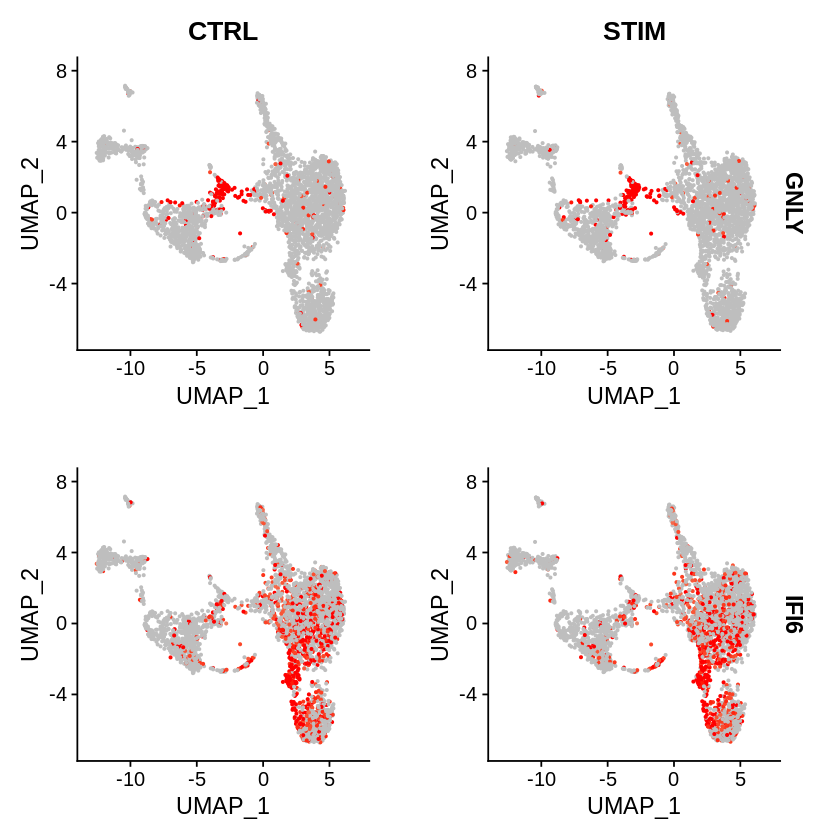

In [ ]:
FeaturePlot(immune.combined_clus1, features = c("CD3D", "GNLY", "IFI6"), split.by = "stim", max.cutoff = 3, 
    cols = c("grey", "red"))

Warning message in FetchData(object = object, vars = features, slot = slot):
“The following requested variables were not found: LYZ”
Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


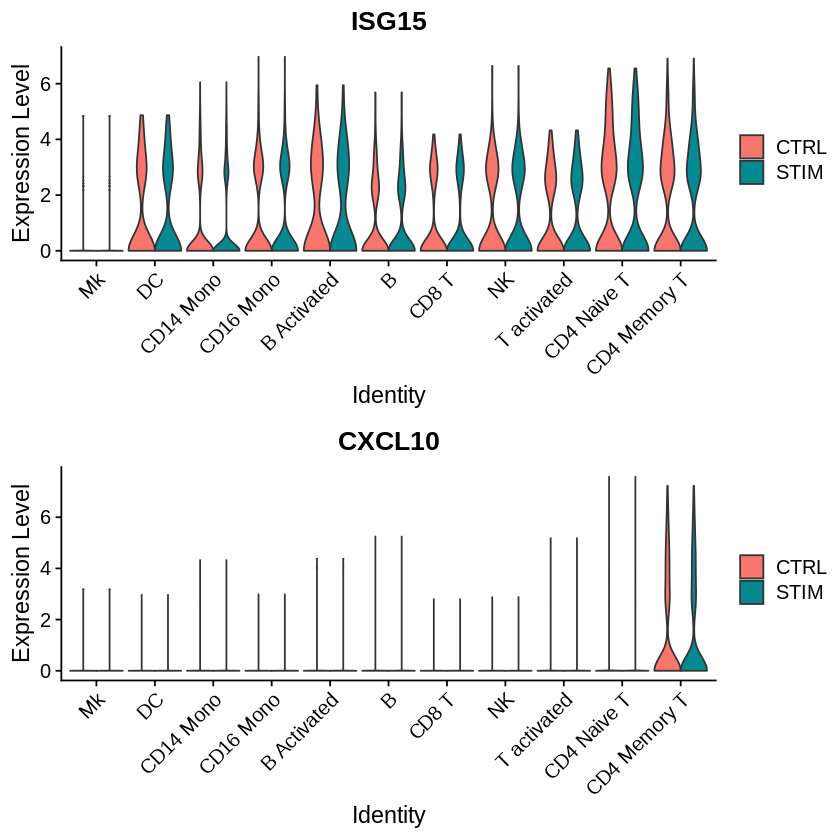

In [ ]:
plots <- VlnPlot(immune.combined_clus1, features = c("LYZ", "ISG15", "CXCL10"), split.by = "stim", group.by = "celltype", 
    pt.size = 0, combine = FALSE)
CombinePlots(plots = plots, ncol = 1)